In [1]:
import os
# import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import glob
from pykml import parser 
import re
# import pymap3d

import seaborn as sns

In [2]:
def gLab_output_to_numpy(output_file):

    NEU_START,NEU_END = 17,20

    with open(output_file,'r') as f:

        # list(map(float,l.split()[NEU_START:NEU_END]))
        lines = f.readlines()
        neu=np.array([list(map(float,l.split()[NEU_START:NEU_END])) for l in lines if re.match('OUTPUT*', l)])#.reshape(3,-1)
        epochs = np.array([float(l.split()[3]) for l in lines if re.match('OUTPUT*', l)])
        # print(output_lines)

        return neu,epochs

In [3]:
files_folder = os.path.join('gLAB','outputs','disturbance')
# files_folder = os.path.join('gLAB','outputs','quiet')

# outtest = glob.glob(os.path.join(files_folder,'gLAB_25_02_2014_c1p.out'))[0]

# c1p_kml = glob.glob(os.path.join(files_folder,'*c1p.kml'))[0]
# dmd_kmls = glob.glob(os.path.join(files_folder,'dmd*.kml'))

glab_outputs = glob.glob(os.path.join(files_folder,'*.out'))
glab_outputs

['gLAB\\outputs\\disturbance\\gLAB_7_11_2014_igs.out',
 'gLAB\\outputs\\disturbance\\gLAB_7_11_2014_c1p.out',
 'gLAB\\outputs\\disturbance\\gLAB_7_11_2014_c1p_dmd_igs_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_7_11_2014_c1p_dmd_igr_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_10_09_2014_igs.out',
 'gLAB\\outputs\\disturbance\\gLAB_10_09_2014_c1p.out',
 'gLAB\\outputs\\disturbance\\gLAB_10_09_2014_c1p_dmd_igs_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_20_12_2014_igs.out',
 'gLAB\\outputs\\disturbance\\gLAB_20_12_2014_c1p.out',
 'gLAB\\outputs\\disturbance\\gLAB_20_12_2014_c1p_dmd_igs_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_20_12_2014_c1p_dmd_igr_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_22_10_2014_igs.out',
 'gLAB\\outputs\\disturbance\\gLAB_22_10_2014_c1p.out',
 'gLAB\\outputs\\disturbance\\gLAB_22_10_2014_c1p_dmd_igs_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_22_10_2014_c1p_dmd_igr_rms.out',
 'gLAB\\outputs\\disturbance\\gLAB_24_10_2014_igs.out',
 'gLAB\\outputs\\disturb

In [4]:
# df_dict = {'time':[],'source':[],'derr':[],'derr_x':[],'derr_y':[],'derr_z':[]}
df_dict = {'Time(s)':[],'Model':[],'Error(m)':[],'Error type':[]}
error_types = ['North','East','Up']
# n_types = 4

for output_file in glab_outputs:
    neu,epochs = gLab_output_to_numpy(output_file)
    n_records = len(epochs)
    n_err_types = neu.shape[1]
    source_name = output_file.split(os.sep)[-1][:-4].lower()
    # print(source_name)
    source_name = ' '.join(source_name.split("_")[4:])
    # print(source_name)
    for i in range(n_err_types):
        df_dict['Time(s)'] += list(epochs)
        df_dict['Model'] += [source_name]*n_records

        df_dict['Error(m)'] += list(neu[:,i])
        df_dict['Error type'] += [error_types[i]]*n_records

   Time(s) Model  Error(m) Error type
0    300.0   igs   -1.4508      North
1    600.0   igs   -1.5578      North
2    900.0   igs   -1.5540      North
3   1200.0   igs   -1.5697      North
4   1500.0   igs   -1.6108      North


No handles with labels found to put in legend.


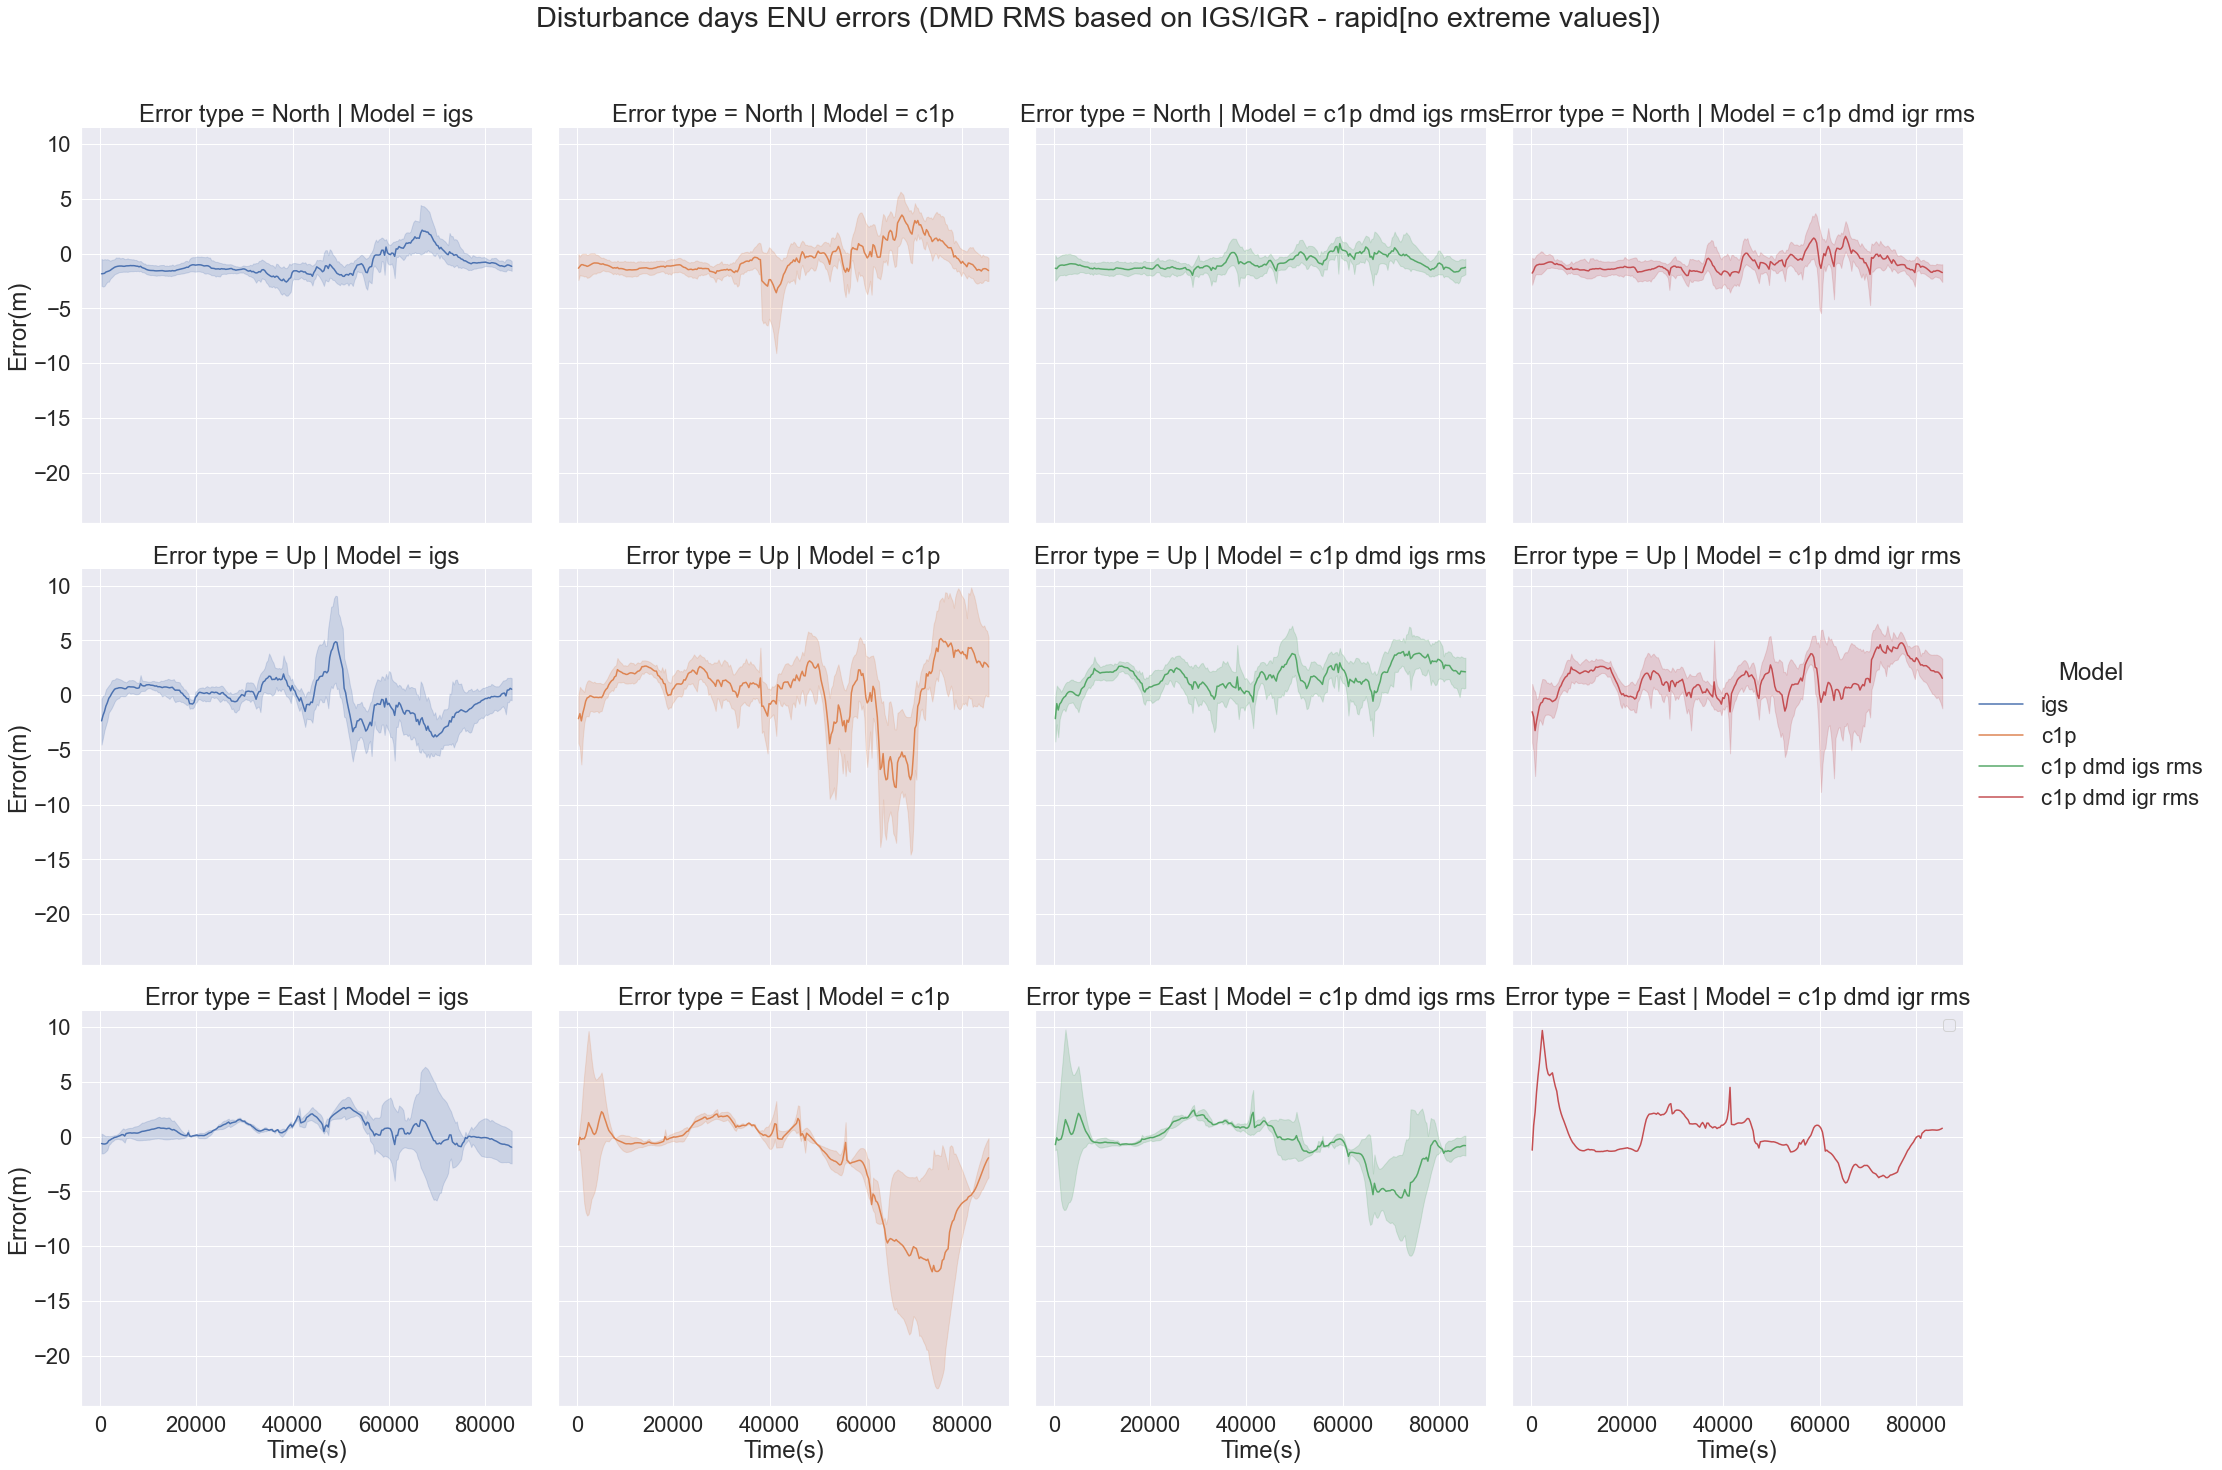

In [5]:
df = pd.DataFrame(df_dict)
df = df[df['Error(m)'] < 50]

print(df.head())

# ax = plt.subplots(1,1,figsize=(25,12))
# ax = plt.xticks(fontsize=14, rotation=0)
# plt.yticks(fontsize=14, rotation=0)
# ax = sns.lineplot(data=df, x="time", y="derr",hue="source")
# sns.set(rc={'figure.figsize':(25,12)})
sns.set_style("whitegrid")
sns.set(font_scale = 2)
g = sns.relplot(x="Time(s)", y="Error(m)", hue="Model",col='Model',row='Error type', kind="line", data=df,height = 7)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Disturbance days ENU errors (DMD RMS based on IGS/IGR - rapid[no extreme values])")
# _ = g.set(xticks=np.arange(1,4,1), yticks=np.arange(1,10,1))
# g.set_titles("Error plot")
# print(g)
# ax.set_ylabel('Error(meters)',fontsize=16)
# ax.set_xlabel('Time(s)',fontsize=16)

plt.legend(prop={'size':15})
plt.show()

# CALCULATE STATISTICS

In [72]:
df_stat = df[(df['Model'] == 'c1p') | (df['Model'] == 'dmd') | (df['Model'] == 'dmdc 72h 2h shift')]

models = ['c1p','dmd','dmdc 72h 2h shift']
errors = ['North','East','Up']

for m in models:
    for e in errors:

        d = temp_df = df_stat[(df_stat['Model'] == m) & (df_stat['Error type'] == e)].describe()
        print(m,e,' AVG: ',d['Error(m)'].loc['mean'],' STD: ',d['Error(m)'].loc['std'])
        print('-------------')
        pass


# df_c1p  = df_stat[df_stat['Model'] == 'c1p'].reset_index()
# df_dmd  = df_stat[df_stat['Model'] == 'dmd'].reset_index()
# df_dmdc = df_stat[df_stat['Model'] == 'dmd 72h 2h shift'].reset_index()


c1p North  AVG:  -0.5256760750586383  STD:  2.715327402510051
-------------
c1p East  AVG:  -2.3991075438596456  STD:  5.496510547895274
-------------
c1p Up  AVG:  0.5452555121188432  STD:  5.2938795648939365
-------------
dmd North  AVG:  -2.0348437060203284  STD:  3.955679784643405
-------------
dmd East  AVG:  -4.634609824561399  STD:  7.603267344665393
-------------
dmd Up  AVG:  -9.708109695074283  STD:  8.820473891481619
-------------
dmdc 72h 2h shift North  AVG:  -1.9815160672400327  STD:  3.9574071753595996
-------------
dmdc 72h 2h shift East  AVG:  -4.58746894736842  STD:  7.626125374463139
-------------
dmdc 72h 2h shift Up  AVG:  -9.710871657544956  STD:  8.800949286966386
-------------


In [6]:
df.head()
df[df['Error(m)'] > 50]

,Time(s),Model,Error(m),Error type


<Figure size 1440x504 with 0 Axes>

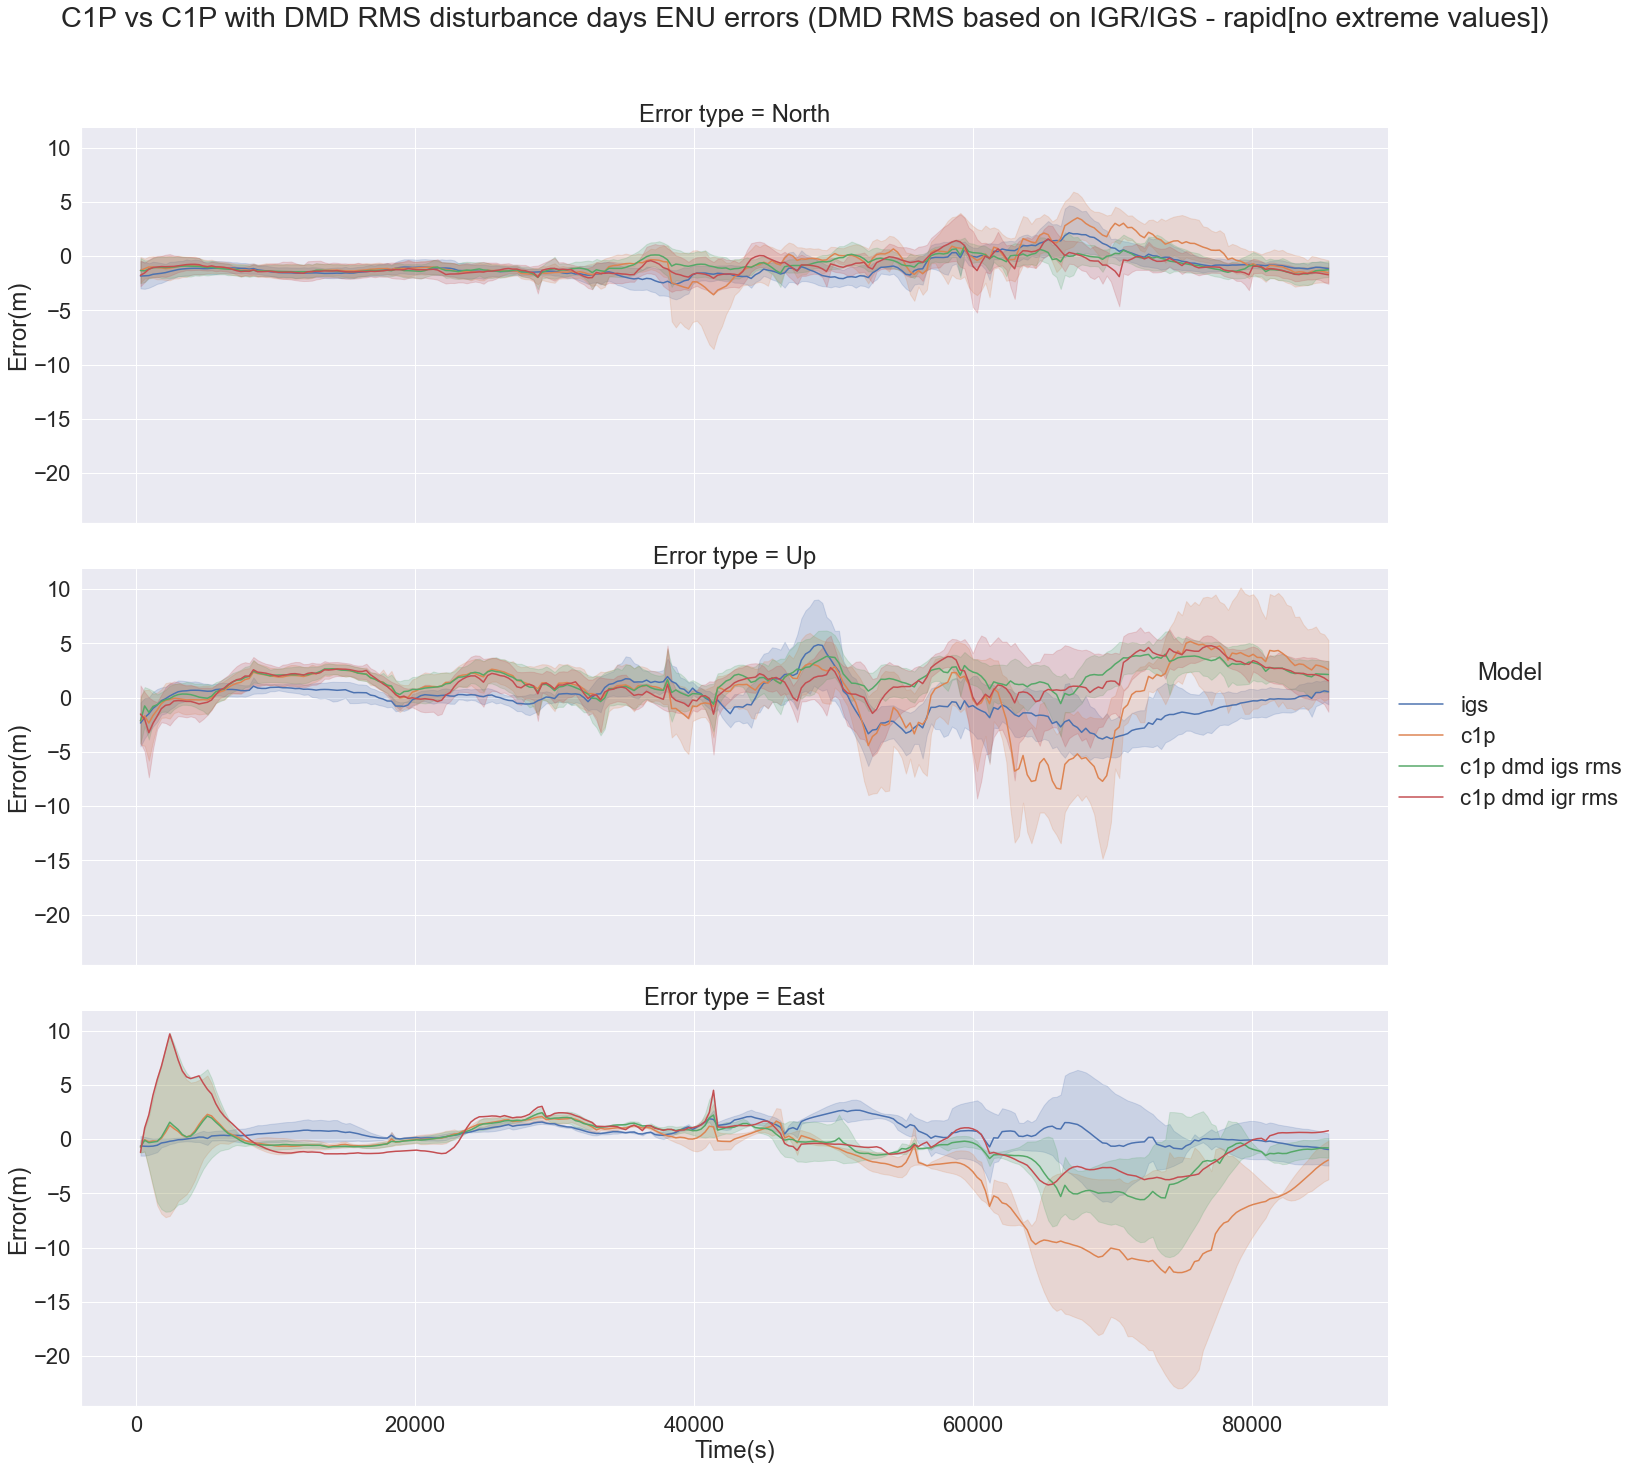

In [6]:
plt.figure(figsize=(20,7))
df_c1p = df[(df['Model'] == 'c1p') | (df['Model'] == 'c1p dmd igs rms') | (df['Model'] == 'c1p dmd igr rms')  | (df['Model'] == 'igs')]
g=sns.relplot(x="Time(s)", y="Error(m)",hue="Model", row='Error type',kind='line',data=df_c1p,height=7,aspect=20.0/7.0)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("C1P vs C1P with DMD RMS disturbance days ENU errors (DMD RMS based on IGR/IGS - rapid[no extreme values])")
plt.show()

<Figure size 1440x504 with 0 Axes>

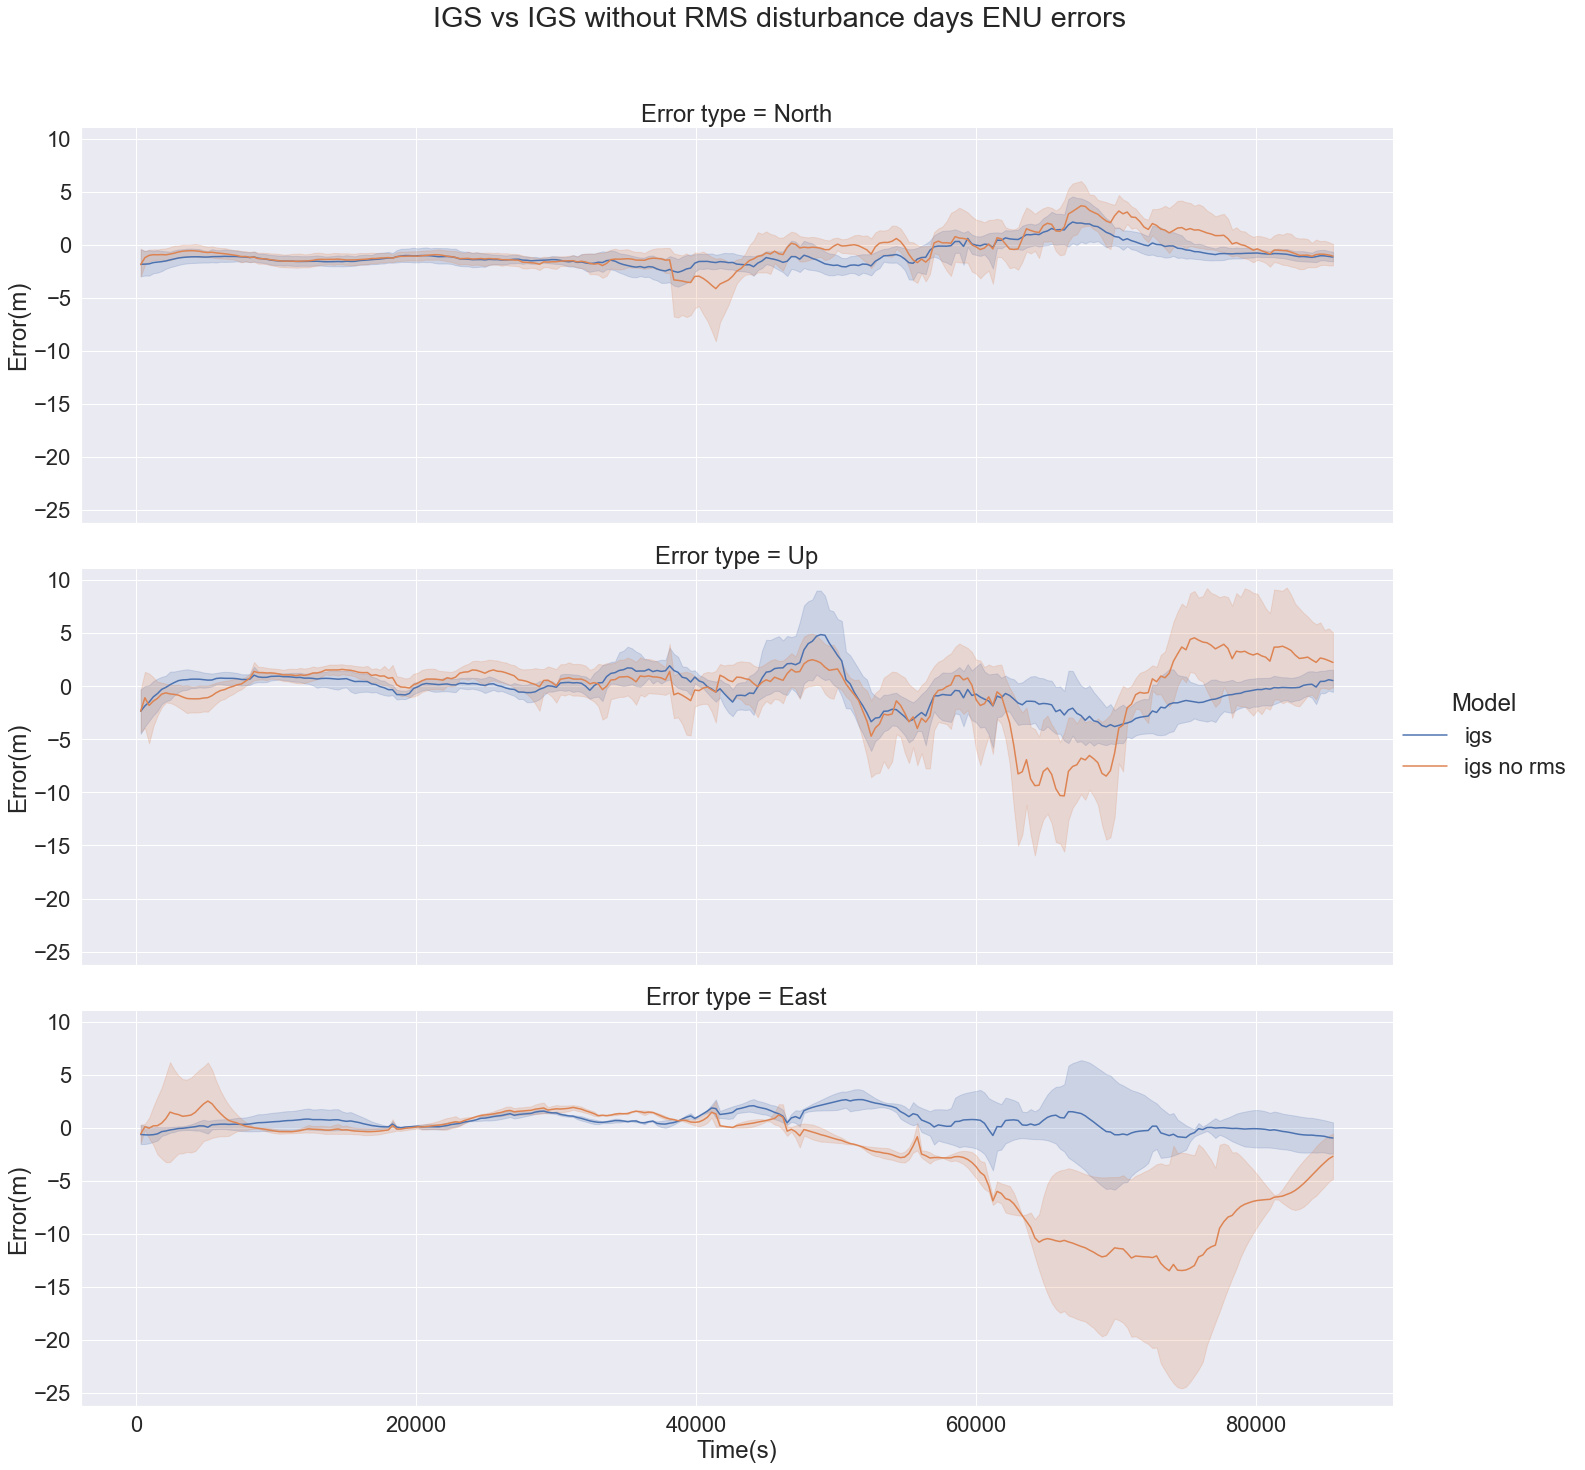

In [10]:
plt.figure(figsize=(20,7))
df_c1p = df[(df['Model'] == 'igs') | (df['Model'] == 'igs no rms')]
g=sns.relplot(x="Time(s)", y="Error(m)",hue="Model", row='Error type',kind='line',data=df_c1p,height=7,aspect=20.0/7.0)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("IGS vs IGS without RMS disturbance days ENU errors")
plt.show()